In [302]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat

In [303]:
class LRegression:
    def __init__(self, x, y, color, title, filename, xlabel, ylabel):
        self.x = x
        self.y = y
        self.x_mean = stat.mean(x)
        self.y_mean = stat.mean(y)

        self.color = color
        self.title = title
        self.filename = filename
        self.xlabel = xlabel
        self.ylabel = ylabel
    
    def get(self):
        #definicao do coeficiente angular (a):
        a_def = 0
        for i in range(len(self.x)):
            a_def += ((self.x[i]-self.x_mean) * (self.y[i]-self.y_mean))
        a_div = 0
        for i in range(len(self.x)):
            a_div += pow((self.x[i] - self.x_mean), 2)
        a = (a_def/a_div)
        b = self.y_mean - (self.x_mean * a) #definicao do coeficiente linear (b)
        
        #incerteza de Y
        incY = 0
        for i in range(len(self.x)):
            incY += pow((self.y[i] - (a * self.x[i] + b)), 2)
        
        incY *= (1/(len(self.x)-2))
        incY = pow(incY, 0.5)
    	
        #incerteza de a:
        incA = 0
        incA = pow(a_div, -1)
        incA = pow(incA, 0.5)
        incA *= incY
        
        #incerteza de b:
        incB = 0
        for i in range(len(self.x)):
            incB += (pow(self.x[i], 2))

        incB*= (1/len(self.x))
        incB = incB/a_div
        incB = pow(incB, 0.5)
        incB*= incY

        y=[]
        for i in range(len(self.x)):
            y.append(a*self.x[i]+b)
       
        
        plt.plot(self.x, self.y, 'k^', label='Dados coletados')
        plt.plot(self.x, y, self.color, label=f'Regressão linear (y = {a :.9f}x + {b :.3f})')
        plt.title(self.title)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.legend()
        plt.grid(True)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.savefig(self.filename, dpi=100, edgecolor="#04253a")
        plt.show() #plot do grafico

        return a, b, incA, incB, incY

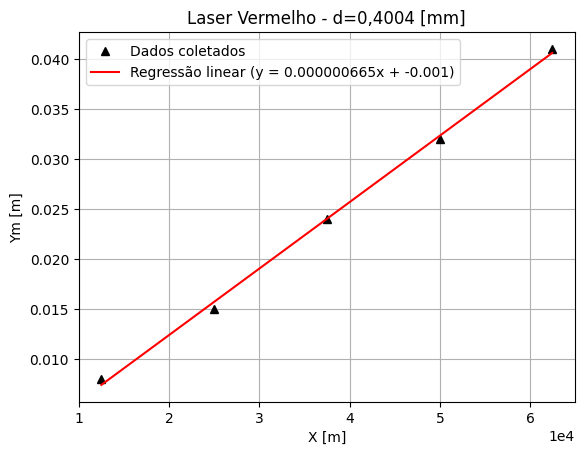

a = 0.00000066, b = -0.00, σa = 0.00000002, σb = 0.00, σy = 0.0


In [304]:
#d=0.4004
#D=5
X = [12487.51249, 24975.02498, 37462.53746, 49950.04995, 62437.56244]
Ym = [0.8, 1.5, 2.4, 3.2, 4.1]
for i in range(len(Ym)):
    Ym[i] = Ym[i]/100

reg04004 = LRegression(X, Ym, 'r-', 'Laser Vermelho - d=0,4004 [mm]', 'p1-d4004reg.jpg', 'X [m]', 'Ym [m]')
a, b, incA, incB, incY = reg04004.get()
lamb1 = a
incl1 = incA
print(f'a = {a :.8f}, b = {b :.2f}, σa = {incA :.8f}, σb = {incB :.2f}, σy = {incY :.1f}')


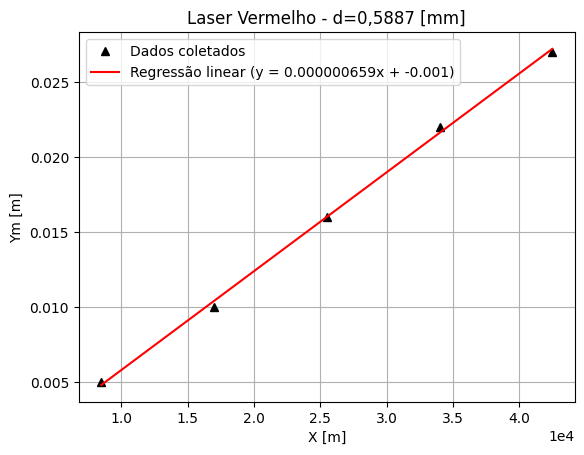

a = 0.00000066, b = -0.00, σa = 0.00000001, σb = 0.00, σy = 0.0


In [305]:
#d=0.5887
#D=5
X = [8493.290301, 16986.5806, 25479.8709, 33973.1612, 42466.4515]
Ym = [0.5, 1.0, 1.6, 2.2, 2.7]
for i in range(len(Ym)):
    Ym[i] = Ym[i]/100

reg05887 = LRegression(X, Ym, 'r-', 'Laser Vermelho - d=0,5887 [mm]', 'p1-05887reg.jpg', 'X [m]', 'Ym [m]')
a, b, incA, incB, incY = reg05887.get()
lamb2 = a
incl2 = incA
print(f'a = {a :.8f}, b = {b :.2f}, σa = {incA :.8f}, σb = {incB :.2f}, σy = {incY :.1f}')


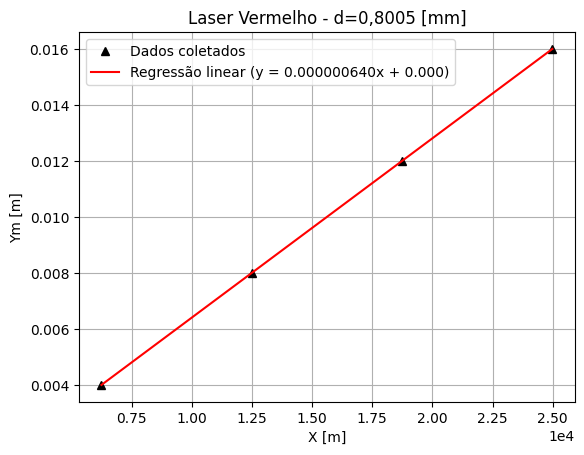

a = 0.0000006404, b = 0.00, σa = 0.00000000000000000000000000000000000000000000000000, σb = 0.00, σy = 0.0


In [306]:
#d=0.8005
#D=5
X = [6246.09619, 12492.19238, 18738.28857, 24984.38476]

Ym = [0.4, 0.8, 1.2, 1.6]
for i in range(len(Ym)):
    Ym[i] = Ym[i]/100

reg08005 = LRegression(X, Ym, 'r-', 'Laser Vermelho - d=0,8005 [mm]', 'p1-08005reg.jpg',  'X [m]', 'Ym [m]')
a, b, incA, incB, incY = reg08005.get()
lamb3 = a
incl3 = incA
print(f'a = {a :.10f}, b = {b :.2f}, σa = {incA :.50f}, σb = {incB :.2f}, σy = {incY :.1f}')


In [307]:
lambdaMedio   = (lamb1 + lamb2 + lamb3)/3 # m
incLambdaM    = (1/3)*(np.sqrt((incl1**2) + (incl2**2) + (incl3**2))) #m
lambdaMedionm = lambdaMedio*pow(10, 9)
incLambdaMnm  =  incLambdaM*pow(10, 9)
print(f' Lambda vermelho médio: {lambdaMedionm :.0f} ± {incLambdaMnm :.0f} [m]')

 Lambda vermelho médio: 655 ± 7 [m]


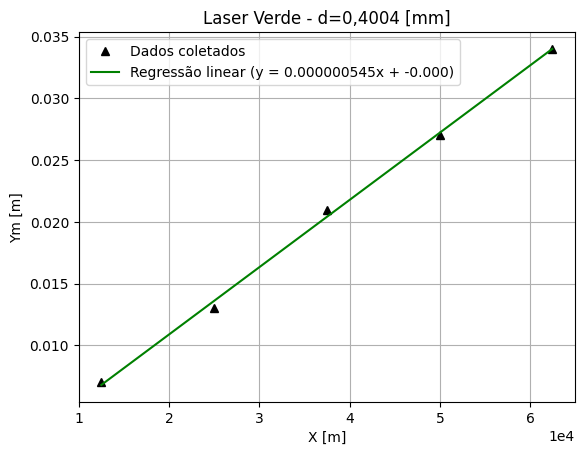

a = 0.00000054, b = -0.00, σa = 0.00000001, σb = 0.00, σy = 0.0


In [308]:
#d=0.4004
#D=4.66
X = [12487.51249, 24975.02498, 37462.53746, 49950.04995, 62437.56244]
Ym = [0.7, 1.3, 2.1, 2.7, 3.4]
for i in range(len(Ym)):
    Ym[i] = Ym[i]/100

reg04004 = LRegression(X, Ym, 'g-', 'Laser Verde - d=0,4004 [mm]', 'p1-d4004regverde.jpg',  'X [m]', 'Ym [m]')
a, b, incA, incB, incY = reg04004.get()
lambverde = a
inclverde = incA
print(f'a = {a :.8f}, b = {b :.2f}, σa = {incA :.8f}, σb = {incB :.2f}, σy = {incY :.1f}')


## FENDA SIMPLES

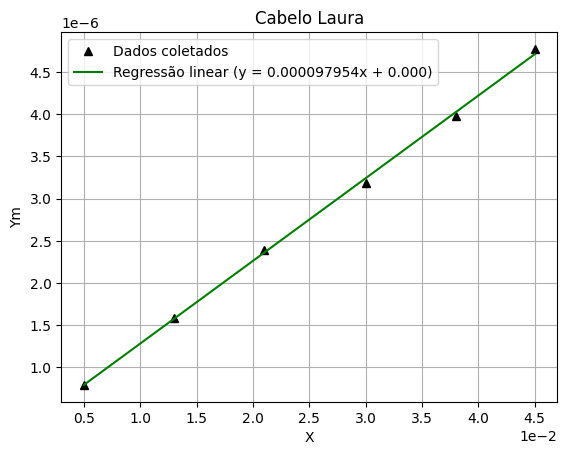

a = 0.000098, b = 0.00, σa = 0.000002, σb = 0.00, σy = 0.0


In [309]:
Ym = [0.5, 1.3, 2.1, 3.0, 3.8, 4.5] #m
for i in range(len(Ym)):
    Ym[i] /= 100


m = [1, 2, 3, 4, 5, 6]
D = 1.215 #m
Y = []
for i in range(len(m)):
    Y.append(m[i]*lambdaMedio*D)

X = Ym

reg_laura = LRegression(X, Y, 'g-', 'Cabelo Laura', 'cabelo_laura.jpg',  'X', 'Ym')
a, b, incA, incB, incY = reg_laura.get()
print(f'a = {a :.6f}, b = {b :.2f}, σa = {incA :6f}, σb = {incB :.2f}, σy = {incY :.1f}')


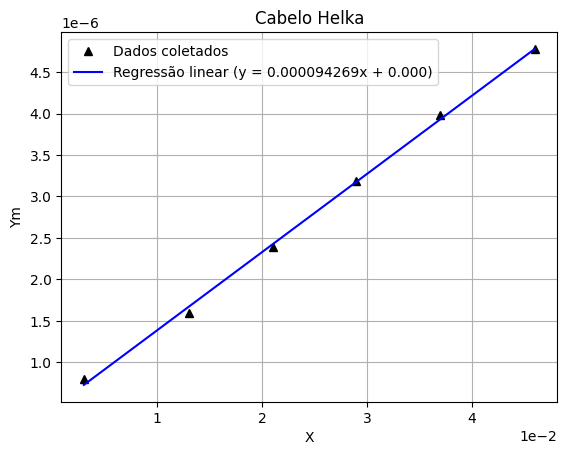

a = 0.000094, b = 0.00, σa = 0.000002, σb = 0.00, σy = 0.0


In [310]:
Ym = [0.3, 1.3, 2.1, 2.9, 3.7, 4.6] #m
for i in range(len(Ym)):
    Ym[i] /= 100


m = [1, 2, 3, 4, 5, 6]
D = 1.215 #m
Y = []
for i in range(len(m)):
    Y.append(m[i]*lambdaMedio*D)

X = Ym

reg_laura = LRegression(X, Y, 'b-', 'Cabelo Helka', 'cabelo_helka.jpg',  'X', 'Ym')
a, b, incA, incB, incY = reg_laura.get()
print(f'a = {a :.6f}, b = {b :.2f}, σa = {incA :6f}, σb = {incB :.2f}, σy = {incY :.1f}')

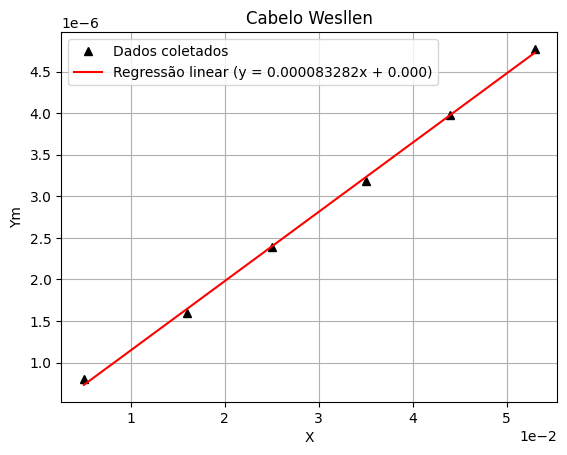

a = 0.000083, b = 0.00, σa = 0.000001, σb = 0.00, σy = 0.0


In [311]:
Ym = [0.5,1.6,2.5,3.5,4.4,5.3] #m
for i in range(len(Ym)):
    Ym[i] /= 100


m = [1, 2, 3, 4, 5, 6]
D = 1.215 #m
Y = []
for i in range(len(m)):
    Y.append(m[i]*lambdaMedio*D)

X = Ym

reg_laura = LRegression(X, Y, 'r-', 'Cabelo Wesllen', 'cabelo_wesllen.jpg',  'X', 'Ym')
a, b, incA, incB, incY = reg_laura.get()
print(f'a = {a :.6f}, b = {b :.2f}, σa = {incA :6f}, σb = {incB :.2f}, σy = {incY :.1f}')

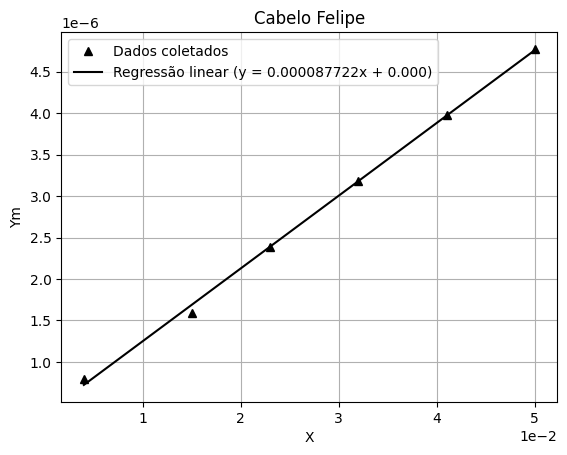

a = 0.000088, b = 0.00, σa = 0.000002, σb = 0.00, σy = 0.0


In [312]:
Ym = [0.4, 1.5, 2.3, 3.2, 4.1, 5] #m
for i in range(len(Ym)):
    Ym[i] /= 100


m = [1, 2, 3, 4, 5, 6]
D = 1.215 #m
Y = []
for i in range(len(m)):
    Y.append(m[i]*lambdaMedio*D)

X = Ym

reg_laura = LRegression(X, Y, 'k-', 'Cabelo Felipe', 'cabelo_felipe.jpg',  'X', 'Ym')
a, b, incA, incB, incY = reg_laura.get()
print(f'a = {a :.6f}, b = {b :.2f}, σa = {incA :6f}, σb = {incB :.2f}, σy = {incY :.1f}')

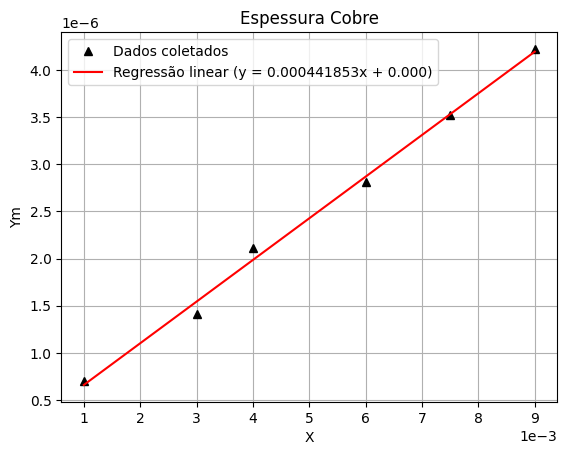

a = 0.000442, b = 0.00, σa = 0.000015, σb = 0.00, σy = 0.0


In [313]:
Ym = [0.10, 0.3, 0.4, 0.6, 0.75, 0.9] #cm
for i in range(len(Ym)):
    Ym[i] /= 100 # m


m = [1, 2, 3, 4, 5, 6] # const
D = 1.075 #m
Y = []
for i in range(len(m)):
    Y.append(m[i]*lambdaMedio*D)

X = Ym

reg_laura = LRegression(X, Y, 'r-', 'Espessura Cobre', 'fio_cobre.jpg',  'X', 'Ym')
a, b, incA, incB, incY = reg_laura.get()
print(f'a = {a :.6f}, b = {b :.2f}, σa = {incA :6f}, σb = {incB :.2f}, σy = {incY :.1f}')